# Image Data Augmentation with Keras

## Importing Libraries

In [2]:
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from PIL import Image
from matplotlib import pyplot as plt

print('Using TensorFlow', tf.__version__)

Using TensorFlow 2.0.0


## Test Image

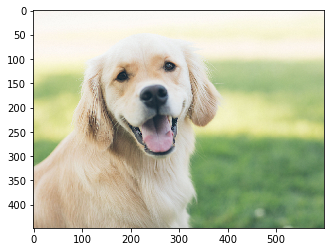

In [5]:
#image_path = 'images/train/cat/cat.jpg'
image_path = 'C:\\Users\\Yuvi\\Desktop\\github learning\\augmentation.png'

plt.imshow(plt.imread(image_path));

## Rotation

In [4]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40
)

Found 1 images belonging to 1 classes.


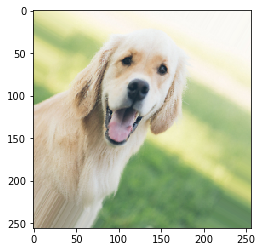

In [15]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

## Shifting - Width and Height 

In [16]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=[-40, -20, 0, 20, 40],
    height_shift_range=[-50,50]
)

Found 1 images belonging to 1 classes.


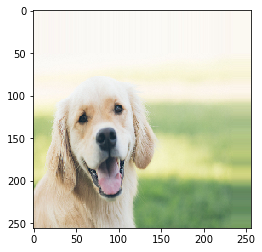

In [17]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

## Altering Brightness

Found 1 images belonging to 1 classes.


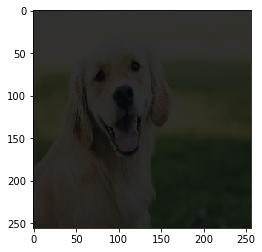

In [18]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    brightness_range=(0., 2.)
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

## Shear Transformation (Tilting an image in x and y direction)

Found 1 images belonging to 1 classes.


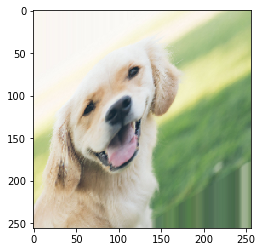

In [21]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    shear_range=45
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

## Zoom-in / Zoom-out

Found 1 images belonging to 1 classes.


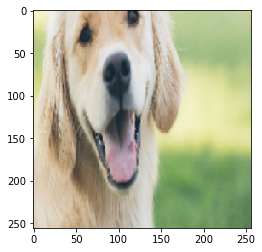

In [27]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range=0.5
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

## Channel Shift

Found 1 images belonging to 1 classes.


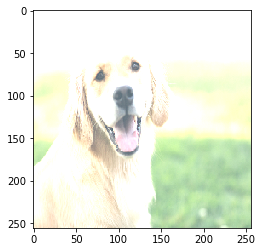

In [30]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    channel_shift_range=100
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

## Flipping horrizontaly and Vertically

Found 1 images belonging to 1 classes.


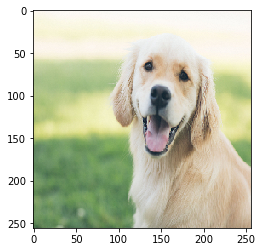

In [37]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

## Normalization

### Featurewise

Loading CIFAR10 dataset and performing normalization based on mean and std deviation by subtracting mean values and dividing the result by standard deviation. X and Y values will lie between -1 to 1 after this operation.

In [38]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

generator = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True, #To subtract mean from all values 
    featurewise_std_normalization=True #To divide result by std. dev.
)

#Fit the generator on entire training set to apply the keras image augmentation
generator.fit(x_train)

170500096/170498071 [==============================] - 86s 1us/step


In [47]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)
print(x_train.mean())

-0.12479595 0.5162999 [[2]]
120.70756512369792


### Samplewise
In this case we dont have to run it for entire dataset, so dont need to use generator.fit method.

In [48]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    samplewise_center=True,
    samplewise_std_normalization=True
)

x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

3.973643e-08 0.9999999 [[0]]


## Rescale and Preprocessing Function
Rescale means multiplying all the pixels values with a fix value. If we use rescale = 1/255 this would mean dividing all pixel values by 255, which is also a form of normalization.
A Preprocessing function uses a 3D tensor as an input and output. It is applied to each example that is generated by our generator. I am using a very common function here which comes with keras implementaion, it normalizes the data as well.

In [49]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    rescale=1.
)

In [50]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))

In [51]:
print(x.mean(), x.std(), y)

-0.16458076 0.43023342 [[8]]


## Finally Using Augmentation in Model Training
Using Keras' Image data generator object with, you can define multiple transformations all together as shown below.

In [54]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=90)

In [ ]:
train_generator = train_datagen.flow_from_directory('D:\\Thesis\\ImageNetMiniData\\56828_109264_bundle_archive\\confirm\\train\\',
                                                    target_size=(64,64),batch_size=40001,
                                                    save_to_dir='D:\\Thesis\\ImageNetMiniData\\56828_109264_bundle_archive\\confirm\\augmented\\')

In [3]:
i=0
for batch in train_generator: 
    i+=1
    if (i>4):
        break

NameError: name 'ImageDataGenerator' is not defined

#### Using pre-trained architecture MobileNetV2 without using its final top layer, average pooling layer and input shape as what it is for CIFAR10 dataset

In [56]:
model = tf.keras.models.Sequential([
    tf.keras.applications.mobilenet_v2.MobileNetV2(
        include_top=False, 
        input_shape=(32, 32, 3), 
        pooling='avg'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

c:\users\yuvi\appdata\local\programs\python\python37\lib\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


9412608/9406464 [==============================] - 15s 2us/step


#### I can create a Generator using flow and can also pass it to the model while it is training. The generator keeps the images in memory.

In [58]:
model.fit(
    generator.flow(x_train, y_train, batch_size=32),
    steps_per_epoch=10, epochs=1
)

Train for 10 steps
10/10 [==============================] - 4s 355ms/step - loss: 2.7975 - accuracy: 0.2094
